In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


## Get training data

In [13]:
dfx= pd.read_csv(".\Training Data\Linear_X_Train.csv")
dfy= pd.read_csv(".\Training Data\Linear_Y_Train.csv")

x=dfx.values
y=dfy.values
print(x.shape)
print(y.shape)


(3750, 1)
(3750, 1)


# Visualise and Preprocess

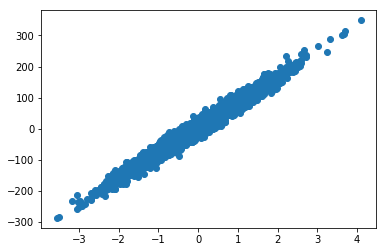

In [14]:
plt.scatter(x,y)
X=(x-x.mean())/x.std()
Y=y
#plt.scatter(X,Y)
plt.show()

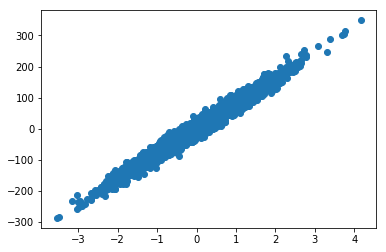

In [15]:
plt.scatter(X,Y)
plt.show()

## Gradient Algorithm
- Start with random theta
- Repeat until converge
    - Update Theta acc to the rule

In [16]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

def error(X,Y,theta):
    m=X.shape[0]
    error=0
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        error+=(hx-Y[i])**2
    return error    

def gradient(X,Y,theta):
    grad=np.zeros((2,))
    m=X.shape[0]
    
    for i in range(m):
        hx= hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
    return grad
        
#Algo
def gradientDescent(X,Y,learning_rate=0.01):
    theta=np.zeros((2,))
    itr=0
    max_itr=100
    error_list=[]
    while(itr<=max_itr):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        e=error_list.append(e)
        theta[0]=theta[0]- learning_rate*grad[0]
        theta[1]=theta[1]- learning_rate*grad[1]
        itr+=1
    return theta,error_list

In [17]:
final_theta,error_list=gradientDescent(X,Y)

C:\Users\arnav\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in add
  # Remove the CWD from sys.path while we load stuff.
C:\Users\arnav\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.


In [18]:
print(final_theta)

[4.23206381e+157 4.94489724e+159]


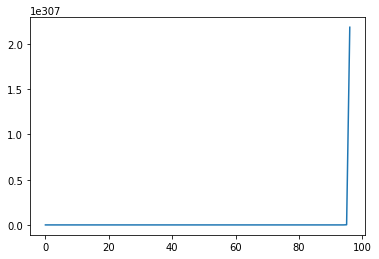

In [19]:
plt.plot(error_list)
plt.show()

### Plot the line for testing

In [20]:
xtest=np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


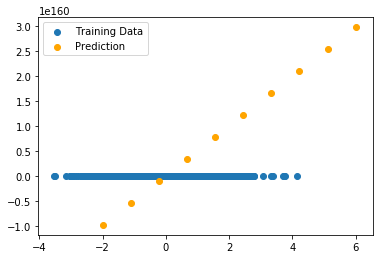

In [21]:
plt.scatter(X,Y,label="Training Data")

plt.scatter(xtest,hypothesis(xtest,final_theta),color="orange",label="Prediction")
plt.legend()
plt.show()